# 🛍️ Mall Customer Segmentation using K-Means Clustering

This project segments mall customers into distinct groups based on their age, income, and spending behavior using **K-Means Clustering**. It's a beginner-friendly unsupervised learning project that applies basic feature engineering, visualization, and evaluation techniques.

# Step 1: Import Libraries


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Dataset (from GitHub)


In [32]:
url = 'https://raw.githubusercontent.com/vijay-patidar-nk/Datasets-for-project/refs/heads/main/Mall_Customers%20VJ.csv'
df = pd.read_csv(url)

# Step 3: Explore the Dataset


shows first 5 rows


In [33]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


give informantion of dataset


In [34]:
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


 writen sum of null(Missing) values in dataset (each column )


In [35]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Step 4: Data Preprocessing

In [36]:
# Rename columns (for ease)
df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'SpendingScore'
}, inplace=True)

# Drop CustomerID (not useful for clustering)
df.drop('CustomerID', axis=1, inplace=True)

# Convert 'Genre' to numeric (0,1)
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

# Optional new feature: Income-to-Age ratio
df['IncomePerAge'] = df['Income'] / df['Age']

# Step 5: Feature Engineering

In [37]:
df['IncomePerAge'] = df['Income'] / df['Age']

#   Feature Selection and Scaling
features = ['Genre', 'Age', 'Income', 'SpendingScore', 'IncomePerAge']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

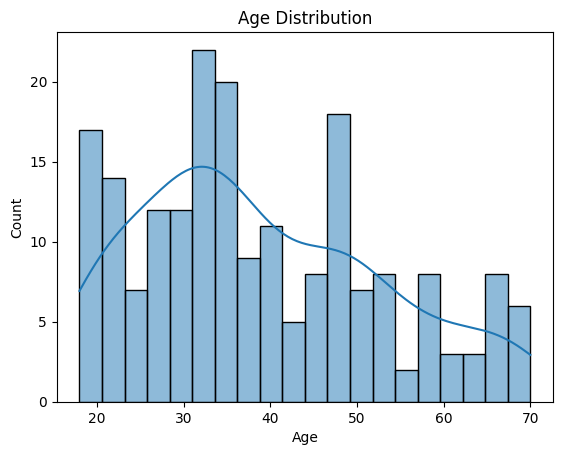

In [38]:
# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Step 6:Applying K-Means Clustering
**Elbow Method to Find Best k**

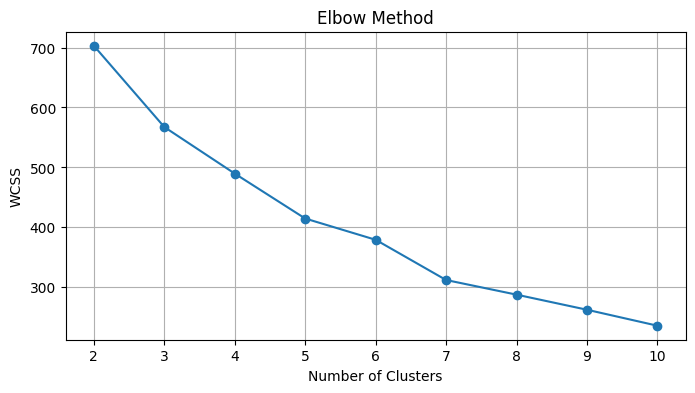

In [39]:
wcss = []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

#  Step 7: Evaluate silhouette scores for different k values

In [40]:
from sklearn.metrics import silhouette_score

print("Silhouette Scores for different values of k:")
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores.append(score)
    print(f"k = {k}, silhouette score = {score:.2f}")

Silhouette Scores for different values of k:
k = 2, silhouette score = 0.27
k = 3, silhouette score = 0.26
k = 4, silhouette score = 0.26
k = 5, silhouette score = 0.29
k = 6, silhouette score = 0.28
k = 7, silhouette score = 0.32
k = 8, silhouette score = 0.32
k = 9, silhouette score = 0.33
k = 10, silhouette score = 0.35


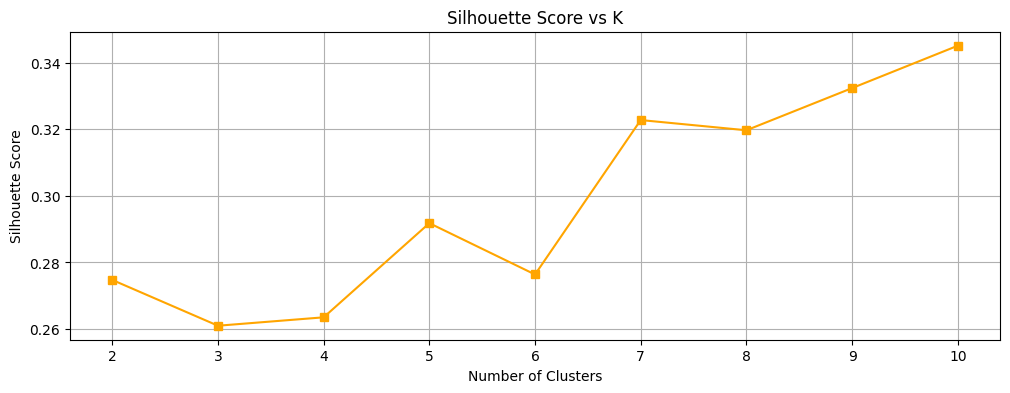

In [41]:
#    Visualize Evaluate silhouette scores for different k values
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(12, 4))
plt.plot(k_range, silhouette_scores, marker='s', color='orange')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Step: 8 Apply KMeans Clustering using best k

Best number of clusters (k): 9 (based on silhouette score)

Highest Silhouette Score: ~0.33

In [42]:
best_k = 9
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 9: Visualize Clusters (2D Plot)


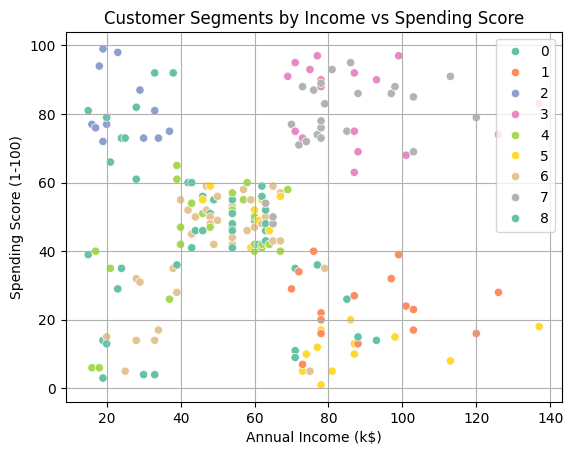

In [43]:
sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='Cluster', palette='Set2')
plt.title('Customer Segments by Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# Cluster Summary
print("\nCluster Summary:")
print(df.groupby('Cluster')[['Age', 'Income', 'SpendingScore']].mean().round(2))


Cluster Summary:
           Age  Income  SpendingScore
Cluster                              
0        56.24   53.68          36.24
1        39.50   90.56          24.19
2        25.58   24.58          81.83
3        33.28   87.11          82.67
4        29.92   46.84          44.04
5        27.91   74.61          28.74
6        52.80   49.17          40.97
7        30.50   83.33          77.79
8        26.92   28.23          68.31


# Step 10: Checking silhouette_score

In [45]:
score = silhouette_score(X_scaled, df['Cluster']) # Change 'scaled_features' to 'X_scaled'
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.33


# 📊 Project Results
- Best `k`:  (based on silhouette score)
- Highest Silhouette Score: ~0.33
- Visualized clusters by Income vs. Spending Score